<a href="https://colab.research.google.com/github/The-Vheed/African-Tuberculosis-Data-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise

Load `tb-burden-country.csv` into a `pandas` data frame and answer the following questions:

1. Which African country has the highest prevalence of TB (as of the most recent data)? Lowest prevalence?
2. What are the total number of deaths from TB per year in South Africa?
3. For each year in the data set, which country has the highest incidence rate when restricted to countries with a method given for deriving incidence estimates?
4. Using the data visualization library of your choice (e.g. `matplotlib`, `seaborn`, `altair`),  make a bar plot showing the incidence rate of TB cases that are HIV-positive over time in Kenya. Include error bars.

In [ ]:
# !git clone https://github.com/hnlee/data-science-interview.git

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('tb-burden-country.csv')
print(df.columns)
df.describe()

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

,ISO numeric country/territory code,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound","Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
count,5120.000000,5120.000000,5.120000e+03,5120.000000,5100.000000,5100.000000,5.120000e+03,5.100000e+03,5.100000e+03,5120.000000,...,3645.000000,3642.000000,3642.000000,3645.000000,3642.000000,3642.000000,0.0,4671.000000,4671.000000,4671.000000
mean,433.576563,2001.549023,2.915671e+07,194.386100,101.815353,321.006367,6.654332e+04,4.615915e+04,9.319791e+04,20.174426,...,40.228274,33.892320,47.326378,6095.426979,5215.147573,7363.644445,NaN,68.217851,61.959409,75.854492
std,255.116018,6.933272,1.183725e+08,259.016385,145.259349,421.326139,3.249488e+05,2.711918e+05,3.938631e+05,32.893800,...,125.175567,105.557348,147.004849,22807.804792,19993.703601,26548.834113,NaN,25.465391,23.603155,29.277633
min,4.000000,1990.000000,1.129000e+03,0.000000,0.110000,0.770000,0.000000e+00,2.000000e-02,1.600000e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,NaN,0.000000,0.000000,0.000000
25%,212.000000,1996.000000,5.601190e+05,23.000000,10.000000,43.000000,3.800000e+02,1.700000e+02,7.200000e+02,1.300000,...,0.190000,0.130000,0.240000,18.000000,12.000000,25.000000,NaN,52.000000,46.000000,59.000000
50%,430.000000,2002.000000,5.172118e+06,85.000000,40.000000,147.000000,4.300000e+03,2.100000e+03,7.700000e+03,5.400000,...,2.100000,1.700000,2.600000,170.000000,130.000000,220.000000,NaN,75.000000,68.000000,82.000000
75%,646.000000,2008.000000,1.752404e+07,272.000000,139.000000,447.000000,2.700000e+04,1.400000e+04,4.500000e+04,25.000000,...,14.000000,12.000000,17.000000,1700.000000,1400.000000,2000.000000,NaN,87.000000,77.000000,95.000000
max,894.000000,2013.000000,1.385567e+09,1762.000000,1316.000000,3038.000000,4.600000e+06,4.000000e+06,5.200000e+06,278.000000,...,1063.000000,981.000000,1438.000000,320000.000000,290000.000000,350000.000000,NaN,320.000000,270.000000,380.000000


In [ ]:
# Which African country has the highest prevalence of TB (as of the most recent data)? Lowest prevalence?

# Using 2013 as the most recent data
df_2013 = df[df['Year'] == 2013]
print("Length of 2013 records:", len(df_2013))

df_2013 = df_2013.sort_values(by=["Estimated prevalence of TB (all forms)"], ascending=False)
print("African Country with the highest prevalence of TB:", df.iloc[0]["Country or territory name"])
print("African Country with the lowest prevalence of TB:", df.iloc[-1]["Country or territory name"])

Length of 2013 records: 217
African Country with the highest prevalence of TB: Afghanistan
African Country with the lowest prevalence of TB: Zimbabwe


In [ ]:
# What are the total number of deaths from TB per year in South Africa?

df_sa = df[df['Country or territory name'] == "South Africa"]
len_df_sa = len(df_sa)
print("Length of South African Death Records:", len_df_sa)

# Add all types of death
total_tb_deaths = df_sa["Estimated number of deaths from TB in people who are HIV-positive"] + df_sa["Estimated number of deaths from TB (all forms, excluding HIV)"]

print("Average death count in SA:", round(total_tb_deaths.mean()))

Length of South African Death Records: 24
Average death count in SA: 73053


In [ ]:
# For each year in the data set, which country has the highest incidence rate when restricted to countries with a method given for deriving incidence estimates?

df_with_methods = df.dropna(subset=['Method to derive incidence estimates'])
print("Length of records with methods:", len(df_with_methods))

print("Year | Country with the highest incidence rate")
for year in sorted(df_with_methods['Year'].unique()):
  df_year = df_with_methods[df_with_methods['Year'] == year]
  df_year = df_year.sort_values(by=["Estimated number of incident cases (all forms)"], ascending=False)
  print(f"{year} | {df_year.iloc[0]['Country or territory name']} ({df_year.iloc[0]['Estimated number of incident cases (all forms)']})")


Length of records with methods: 2987
Year | Country with the highest incidence rate
1990 | India (1900000.0)
1991 | India (1900000.0)
1992 | India (2000000.0)
1993 | India (2000000.0)
1994 | India (2000000.0)
1995 | India (2100000.0)
1996 | India (2100000.0)
1997 | India (2100000.0)
1998 | India (2200000.0)
1999 | India (2200000.0)
2000 | India (2300000.0)
2001 | India (2300000.0)
2002 | India (2300000.0)
2003 | India (2300000.0)
2004 | India (2400000.0)
2005 | India (2400000.0)
2006 | India (2300000.0)
2007 | India (2300000.0)
2008 | India (2300000.0)
2009 | India (2300000.0)
2010 | India (2200000.0)
2011 | India (2200000.0)
2012 | India (2200000.0)
2013 | India (2100000.0)


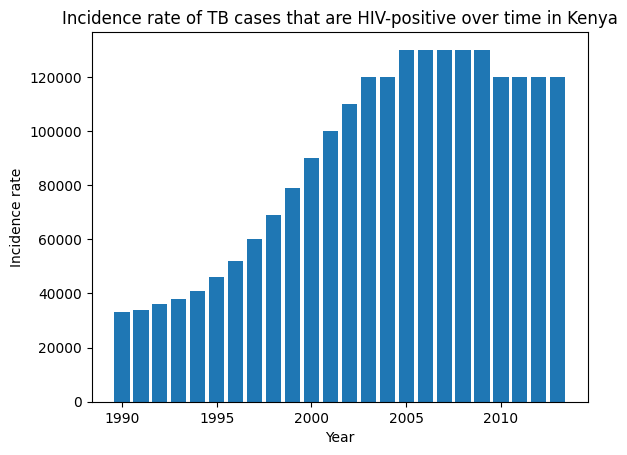

In [ ]:
# Using the data visualization library of your choice (e.g. matplotlib, seaborn, altair), make a bar plot showing the incidence rate of TB cases that are HIV-positive over time in Kenya. Include error bars.

import matplotlib.pyplot as plt

df_kenya = df[df['Country or territory name'] == "Kenya"]
df_kenya = df_kenya.sort_values(by=["Year"])

x = df_kenya['Year']
h = df_kenya['Estimated number of incident cases (all forms)']
plt.bar(x, h)
plt.title("Incidence rate of TB cases that are HIV-positive over time in Kenya")
plt.xlabel("Year")
plt.ylabel("Incidence rate")
plt.show()